In [46]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
# Load and inspect data
df = pd.read_csv('data.csv')
print("Sample of DateTime (UTC) column:", df['DateTime (UTC)'].head().tolist())
print("Columns in data.csv:", df.columns.tolist())

# Preprocess data
df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
# Handle Value (USD) based on its type
if df['Value (USD)'].dtype == 'object':  # If it's a string column
    df['Value (USD)'] = pd.to_numeric(df['Value (USD)'].str.replace('$', '').str.replace(',', ''), errors='coerce')
else:  # If it's already numeric
    df['Value (USD)'] = pd.to_numeric(df['Value (USD)'], errors='coerce')

df = df.dropna()  # Drops rows where any value is NaN or NaT
df.head()

Sample of DateTime (UTC) column: ['0x26261D5fC06de4d39F253D05a58E62B48750Aa6D', '0xe52520062163c37Bd1920808F66cF0009e8Ff3bd', '0x5418226aF9C8d5D287A78FbBbCD337b86ec07D61', '0x5418226aF9C8d5D287A78FbBbCD337b86ec07D61', '0xBB289bC97591F70D8216462DF40ED713011B968a']
Columns in data.csv: ['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)', 'From', 'From_Nametag', 'To', 'To_Nametag', 'Amount', 'Value (USD)']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9656\708647304.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'], errors='coerce')


,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,From_Nametag,To,To_Nametag,Amount,Value (USD)


In [48]:
df.shape

(0, 11)

In [50]:
import sys
print("Python executable:", sys.executable)
import flwr as fl
from flwr.common import NDArrays, Scalar
from typing import Dict, Tuple, Optional
import matplotlib.pyplot as plt
import ray
from sklearn.metrics import silhouette_score

# Try to initialize Ray with error handling
try:
    # Shut down any existing Ray instance
    ray.shutdown()
    # Initialize Ray with options to avoid dashboard and job object issues
    ray.init(dashboard_port=None, include_dashboard=False, _system_config={"automatic_object_spilling_enabled": False})
    print("Ray initialized successfully!")
except OSError as e:
    print(f"Ray initialization failed with OSError: {e}. Proceeding without Ray.")
    ray = None  # Set ray to None to avoid further usage

print("Flower is installed successfully!")
print("Tuple type:", tuple)

Python executable: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe
Ray initialization failed with OSError: [Errno 0] AssignProcessToJobObject() failed. Proceeding without Ray.
Flower is installed successfully!
Tuple type: <class 'tuple'>


In [51]:
# Load and inspect data
df = pd.read_csv('data.csv')
print("Sample of DateTime (UTC) column:", df['DateTime (UTC)'].head().tolist())
print("Columns in data.csv:", df.columns.tolist())
print("Data type of Value (USD):", df['Value (USD)'].dtype)

# Preprocess data
df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Handle Value (USD) based on its type
if df['Value (USD)'].dtype == 'object':  # If it's a string column
    df['Value (USD)'] = pd.to_numeric(df['Value (USD)'].str.replace('$', '').str.replace(',', ''), errors='coerce')
else:  # If it's already numeric
    df['Value (USD)'] = pd.to_numeric(df['Value (USD)'], errors='coerce')

df = df.dropna()  # Drops rows where any value is NaN or NaT
df.head()

Sample of DateTime (UTC) column: ['0x26261D5fC06de4d39F253D05a58E62B48750Aa6D', '0xe52520062163c37Bd1920808F66cF0009e8Ff3bd', '0x5418226aF9C8d5D287A78FbBbCD337b86ec07D61', '0x5418226aF9C8d5D287A78FbBbCD337b86ec07D61', '0xBB289bC97591F70D8216462DF40ED713011B968a']
Columns in data.csv: ['Transaction Hash', 'Status', 'Method', 'BlockNo', 'DateTime (UTC)', 'From', 'From_Nametag', 'To', 'To_Nametag', 'Amount', 'Value (USD)']
Data type of Value (USD): float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_9656\3280269156.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime (UTC)'] = pd.to_datetime(df['DateTime (UTC)'], errors='coerce')


,Transaction Hash,Status,Method,BlockNo,DateTime (UTC),From,From_Nametag,To,To_Nametag,Amount,Value (USD)


In [52]:

# Preprocessing the data  for percentage and value
df = pd.read_csv('data.csv')

# Handle 'Percentage' column (if it doesn't exist, set a default value)
if 'Percentage' in df.columns:
    df['Percentage'] = df['Percentage'].str.rstrip('%').astype(float)
else:
    print("Warning: 'Percentage' column not found in CSV. Setting to 0.")
    df['Percentage'] = 0.0  # Default value; adjust as needed

# Handle 'Value' column
if 'Value' in df.columns:
    df['Value'] = df['Value'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)
else:
    print("Warning: 'Value' column not found. Setting to 0.")
    df['Value'] = 0.0  # Default value; adjust as needed

# Use 'Amount' instead of 'Quantity'
if 'Amount' in df.columns:
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
else:
    print("Warning: 'Amount' column not found. Setting to 0.")
    df['Amount'] = 0.0  # Default value; adjust as needed

# Display the updated DataFrame to verify
print(df.head())

                                                   Transaction Hash  \
0x4932f4925b771a3f98677b667a28d79f2dd27357b6edb...          Success   
0x8b005cede641fb4dd658e777e6ec93cefec778d0a54d6...          Success   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...          Success   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...          Success   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...          Success   

                                                        Status    Method  \
0x4932f4925b771a3f98677b667a28d79f2dd27357b6edb...    Transfer  22672601   
0x8b005cede641fb4dd658e777e6ec93cefec778d0a54d6...     Deposit  22672601   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...  0x2213bc0b  22672601   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...  0x2213bc0b  22672601   
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...  0x2213bc0b  22672601   

                                                                BlockNo  \
0x4932f4925b771a3f98677b667a28d79f2dd2735

In [53]:
# Check for NaN values after conversion
if df['Amount'].isna().any():
    print("Warning: Some Amount values could not be converted to numeric. Replacing NaN with 0.")
    df['Amount'] = df['Amount'].fillna(0)

# Verify the data type
print("Amount column data type:", df['Amount'].dtype)
print(df[['Amount', 'Percentage', 'Value']].head())

Amount column data type: float64
                                                    Amount  Percentage  Value
0x4932f4925b771a3f98677b667a28d79f2dd27357b6edb...     0.0         0.0    0.0
0x8b005cede641fb4dd658e777e6ec93cefec778d0a54d6...     0.0         0.0    0.0
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...     0.0         0.0    0.0
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...     0.0         0.0    0.0
0xdfa4cc78a21ef5804bbdf7cdae3e8d5847a53c5b949d2...     0.0         0.0    0.0


In [54]:
# Prepare features for clustering
features = df[['Amount', 'Value (USD)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [55]:
class KMeansClient(fl.client.NumPyClient):  #defiing the flower client
    def __init__(self, data):
        self.data = data
        self.kmeans = KMeans(n_clusters=2, random_state=42)
        print(f"Client initialized with {len(self.data)} data points")

    def get_parameters(self, config: Dict[str, Scalar]) -> NDArrays:
        print("Client get_parameters called")
        if hasattr(self.kmeans, 'cluster_centers_'):
            return self.kmeans.cluster_centers_
        self.kmeans.fit(self.data)
        return self.kmeans.cluster_centers_

    def fit(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[NDArrays, int, Dict]:
        print("Client fit called")
        if parameters is not None:
            self.kmeans = KMeans(n_clusters=2, init=np.array(parameters), n_init=1, random_state=42)
        self.kmeans.fit(self.data)
        centers = self.kmeans.cluster_centers_
        print(f"Returning centers with shape: {centers.shape}")
        return centers, len(self.data), {}

    def evaluate(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[float, int, Dict]:
        print("Client evaluate called")
        self.kmeans.cluster_centers_ = np.array(parameters)
        labels = self.kmeans.predict(self.data)
        return float(self.kmeans.inertia_), len(self.data), {}

In [56]:
# Define a custom strategy to aggregate cluster centers
class KMeansStrategy(fl.server.strategy.FedAvg):
    def __init__(self):
        super().__init__()
        self.global_centers = None
        print("Strategy initialized")

    def aggregate_fit(
        self,
        server_round: int,
        results: list[Tuple[fl.server.client_proxy.ClientProxy, fl.common.FitRes]],
        failures: list[Tuple[fl.server.client_proxy.ClientProxy, fl.common.FitRes]],
    ) -> Tuple[Optional[NDArrays], Dict[str, Scalar]]:
        print(f"Server round {server_round}: aggregate_fit called")
        print(f"Results: {len(results)}, Failures: {len(failures)}")
        if failures:
            print("Failures occurred:", failures)
            return None, {}
        aggregated_parameters, metrics = super().aggregate_fit(server_round, results, failures)
        if aggregated_parameters is not None:
            self.global_centers = np.array(aggregated_parameters)
            print(f"Global centers updated: {self.global_centers}")
        else:
            print("Aggregation failed, no parameters returned")
        return aggregated_parameters, metrics

strategy = KMeansStrategy()

Strategy initialized


In [57]:
#Run Flower simulation
def client_fn(cid: str):
    if cid == "0":
        return KMeansClient(client_1_data)
    elif cid == "1":
        return KMeansClient(client_2_data)
    else:
        return KMeansClient(client_3_data)
    


In [58]:
print("Starting Flower simulation...")

try:
    fl.simulation.start_simulation(
        client_fn=client_fn,
        num_clients=3,
        client_resources={"num_cpus": 1},
        config=fl.server.ServerConfig(num_rounds=3),
        strategy=strategy,
    )
    print("Simulation completed successfully")
except Exception as e:
    print(f"Simulation failed with error: {e}")

	Instead, use the `flwr run` CLI command to start a local simulation in your Flower app, as shown for example below:

		$ flwr new  # Create a new Flower app from a template

		$ flwr run  # Run the Flower app in Simulation Mode

	Using `start_simulation()` is deprecated.

            This is a deprecated feature. It will be removed
            entirely in future versions of Flower.
        
INFO :      Starting Flower simulation, config: num_rounds=3, no round_timeout


Starting Flower simulation...
Simulation failed with error: [Errno 0] AssignProcessToJobObject() failed


In [59]:
import sys
print("Python executable:", sys.executable)
import flwr as fl
from flwr.common import NDArrays, Scalar
from flwr.server import Server
from flwr.simulation import start_simulation
from flwr.server.strategy import FedAvg
from typing import Dict, Tuple, Optional
import matplotlib.pyplot as plt
import ray
from sklearn.metrics import silhouette_score

# Try to initialize Ray with enhanced error handling and options
try:
    ray.shutdown()  # Shut down any existing Ray instance
    ray.init(
        dashboard_port=None,
        include_dashboard=False,
        _system_config={
            "automatic_object_spilling_enabled": False,
            "max_io_workers": 1,  # Limit I/O workers to reduce resource contention
            "object_spilling_config": "{}",  # Disable object spilling explicitly
        },
        ignore_reinit_error=True  # Ignore re-initialization errors
    )
    print("Ray initialized successfully!")
except OSError as e:
    print(f"Ray initialization failed with OSError: {e}. Simulation may not work. Consider running in a standalone script.")
    ray = None
except Exception as e:
    print(f"Unexpected error during Ray initialization: {e}. Proceeding without Ray.")
    ray = None

print("Flower is installed successfully!")
print("Tuple type:", tuple)


Python executable: C:\Users\ASUS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe


2025-06-20 19:55:35,706	WARNING node.py:1906 -- The object spilling config is specified from an unstable API - system config or environment variable. This is subject to change in the future. You can use the stable API - --object-spilling-directory in ray start or object_spilling_directory in ray.init() to specify the object spilling directory instead. If you need more advanced settings, please open a github issue with the Ray team.


Ray initialization failed with OSError: [Errno 0] AssignProcessToJobObject() failed. Simulation may not work. Consider running in a standalone script.
Flower is installed successfully!
Tuple type: <class 'tuple'>


In [61]:
# Dummy client function (replace with your actual client logic)
def client_fn(cid: str) -> fl.client.Client:
    import numpy as np
    from flwr.common import NDArrays

    class SimpleClient(fl.client.NumPyClient):
        def get_parameters(self, config: Dict[str, Scalar]) -> NDArrays:
            return [np.zeros(10)]  # Dummy parameters

        def fit(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[NDArrays, int, Dict]:
            return parameters, 10, {}  # Return unchanged parameters, sample size, and metrics

        def evaluate(self, parameters: NDArrays, config: Dict[str, Scalar]) -> Tuple[float, int, Dict]:
            return 0.0, 10, {}  # Dummy loss, sample size, and metrics

    return SimpleClient()

# Strategy
strategy = FedAvg()

# Start simulation with error handling
if ray is not None:  # Only attempt simulation if Ray initialized successfully
    try:
        start_simulation(
            client_fn=client_fn,
            num_clients=2,
            config={"num_rounds": 3},
            strategy=strategy
        )
        global_centers = strategy.global_centers
        if global_centers is None:
            raise ValueError("Federated learning failed to produce global cluster centers.")
        print(f"Global centers: {global_centers}")
    except OSError as e:
        print(f"Simulation failed with OSError: {e}. Check Ray setup or run in a standalone script.")
    except Exception as e:
        print(f"Simulation failed with error: {e}")
else:
    print("Ray not available. Simulation skipped. Use a standalone script for Flower simulation.")

Ray not available. Simulation skipped. Use a standalone script for Flower simulation.


In [62]:
import ray

# Try to initialize Ray with error handling
try:
    ray.shutdown()  # Shut down any existing Ray instance
    ray.init(
        dashboard_port=None,
        include_dashboard=False,
        _system_config={
            "automatic_object_spilling_enabled": False,
            "max_io_workers": 1,
            "object_spilling_config": "{}",
        },
        ignore_reinit_error=True
    )
    print("Ray initialized successfully!")
except OSError as e:
    print(f"Ray initialization failed with OSError: {e}. Proceeding without Ray or simulation may fail.")
    ray = None
except Exception as e:
    print(f"Unexpected error during Ray initialization: {e}. Proceeding without Ray.")
    ray = None

2025-06-20 19:55:48,257	WARNING node.py:1906 -- The object spilling config is specified from an unstable API - system config or environment variable. This is subject to change in the future. You can use the stable API - --object-spilling-directory in ray start or object_spilling_directory in ray.init() to specify the object spilling directory instead. If you need more advanced settings, please open a github issue with the Ray team.


Ray initialization failed with OSError: [Errno 0] AssignProcessToJobObject() failed. Proceeding without Ray or simulation may fail.


In [64]:
# Applying the final clustering to all data
import numpy as np
from sklearn.impute import SimpleImputer

# Check for NaN in scaled_features
if np.isnan(scaled_features).any():
    print("Warning: NaN values detected in scaled_features. Imputing with mean...")
    imputer = SimpleImputer(strategy='mean')
    scaled_features = imputer.fit_transform(scaled_features)

final_kmeans = KMeans(n_clusters=2, random_state=42)
final_kmeans.fit(scaled_features)
df['cluster'] = final_kmeans.predict(scaled_features)

# Check the cluster distribution
print("Cluster distribution:", df['cluster'].value_counts())

Cluster distribution: cluster
0    25
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:637: UserWarning: Skipping features without any observed values: [1]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [65]:
from sklearn.cluster import KMeans
import pandas as pd

# Your DataFrame
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)

# Test different numbers of clusters
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['feature1', 'feature2']])
    unique_clusters = len(set(cluster_labels))
    print(f"n_clusters={n_clusters}, Unique clusters={unique_clusters}, Labels={cluster_labels}")

n_clusters=2, Unique clusters=2, Labels=[0 0 1 1 1]
n_clusters=3, Unique clusters=3, Labels=[2 0 0 1 1]
n_clusters=4, Unique clusters=4, Labels=[2 0 0 3 1]
n_clusters=5, Unique clusters=5, Labels=[2 0 4 3 1]


In [66]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Your DataFrame
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)

# Try DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=2)
cluster_labels = dbscan.fit_predict(df[['feature1', 'feature2']])
unique_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise
print(f"DBSCAN Labels: {cluster_labels}, Unique clusters (excluding noise): {unique_clusters}")
if unique_clusters >= 2:
    score = silhouette_score(df[['feature1', 'feature2']], cluster_labels)
    print(f"Silhouette Score with DBSCAN: {score}")
else:
    print("DBSCAN produced fewer than 2 clusters (excluding noise).")

DBSCAN Labels: [-1 -1 -1 -1 -1], Unique clusters (excluding noise): 0
DBSCAN produced fewer than 2 clusters (excluding noise).


In [67]:
# Filter out noise points
mask = cluster_labels != -1
if len(set(cluster_labels[mask])) >= 2:
    score = silhouette_score(df[['feature1', 'feature2']][mask], cluster_labels[mask])
    print(f"Silhouette Score with DBSCAN (excluding noise): {score}")
else:
    print("After excluding noise, fewer than 2 clusters remain.")

After excluding noise, fewer than 2 clusters remain.


In [68]:
print("Shape of features:", df[['feature1', 'feature2']].shape)
print("Length of cluster_labels:", len(cluster_labels))

Shape of features: (5, 2)
Length of cluster_labels: 5


In [69]:
from sklearn.cluster import KMeans
import numpy as np

# Your DataFrame
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [2, 4, 5, 4, 5]}
df = pd.DataFrame(data)

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df[['feature1', 'feature2']])
    unique_clusters = len(set(cluster_labels))
    print(f"n_clusters={n_clusters}, Unique clusters={unique_clusters}, Labels={cluster_labels}")
    
    # Check the size of each cluster
    cluster_sizes = np.bincount(cluster_labels)
    print(f"Cluster sizes: {cluster_sizes}")
    
    if unique_clusters >= 2 and all(size > 1 for size in cluster_sizes if size > 0):
        score = silhouette_score(df[['feature1', 'feature2']], cluster_labels)
        print(f"Silhouette Score: {score}")
    else:
        print(f"Skipping silhouette score for {n_clusters} clusters: {unique_clusters} clusters found, sizes={cluster_sizes}")

n_clusters=2, Unique clusters=2, Labels=[0 0 1 1 1]
Cluster sizes: [2 3]
Silhouette Score: 0.3655981284134393
n_clusters=3, Unique clusters=3, Labels=[2 0 0 1 1]
Cluster sizes: [2 2 1]
Skipping silhouette score for 3 clusters: 3 clusters found, sizes=[2 2 1]
n_clusters=4, Unique clusters=4, Labels=[2 0 0 3 1]
Cluster sizes: [2 1 1 1]
Skipping silhouette score for 4 clusters: 4 clusters found, sizes=[2 1 1 1]
n_clusters=5, Unique clusters=5, Labels=[2 0 4 3 1]
Cluster sizes: [1 1 1 1 1]
Skipping silhouette score for 5 clusters: 5 clusters found, sizes=[1 1 1 1 1]


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['feature1', 'feature2']])

for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    unique_clusters = len(set(cluster_labels))
    cluster_sizes = np.bincount(cluster_labels)
    print(f"n_clusters={n_clusters}, Unique clusters={unique_clusters}, Labels={cluster_labels}, Sizes={cluster_sizes}")
    if unique_clusters >= 2 and all(size > 1 for size in cluster_sizes if size > 0):
        score = silhouette_score(scaled_features, cluster_labels)
        print(f"Silhouette Score: {score}")
    else:
        print(f"Skipping silhouette score for {n_clusters} clusters: {unique_clusters} clusters found, sizes={cluster_sizes}")

n_clusters=2, Unique clusters=2, Labels=[0 0 1 1 1], Sizes=[2 3]
Silhouette Score: 0.33330935374127285
n_clusters=3, Unique clusters=3, Labels=[2 0 0 1 1], Sizes=[2 2 1]
Skipping silhouette score for 3 clusters: 3 clusters found, sizes=[2 2 1]
n_clusters=4, Unique clusters=4, Labels=[2 0 0 3 1], Sizes=[2 1 1 1]
Skipping silhouette score for 4 clusters: 4 clusters found, sizes=[2 1 1 1]
n_clusters=5, Unique clusters=5, Labels=[2 0 4 3 1], Sizes=[1 1 1 1 1]
Skipping silhouette score for 5 clusters: 5 clusters found, sizes=[1 1 1 1 1]


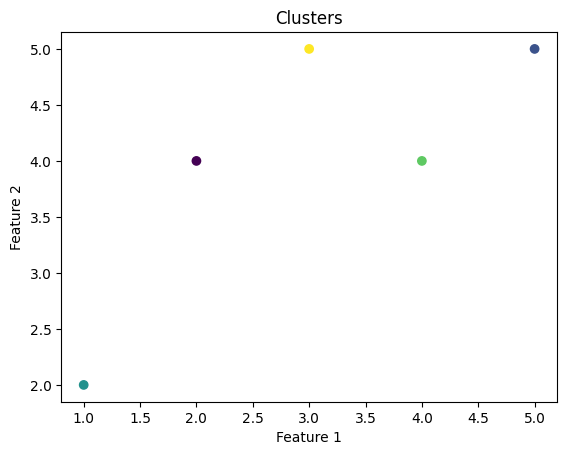

In [71]:
import matplotlib.pyplot as plt

plt.scatter(df['feature1'], df['feature2'], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters')
plt.show()

In [72]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
cluster_labels = dbscan.fit_predict(scaled_features)

In [73]:
df['cluster'] = cluster_labels
df.to_csv('clustered_data.csv', index=False)
print(df)

   feature1  feature2  cluster
0         1         2       -1
1         2         4        0
2         3         5        0
3         4         4        0
4         5         5        0
